<a href="https://colab.research.google.com/github/ziaArzoo/spark-foundation/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


EXPLORATORY DATA ANALYSIS

By :** MD ZIA ARZOO  **                                                                        
*data science and business analytics intern @The spark foundation*

Dataset: https://bit.ly/3i4rbWl

*#GRIPAUGUST21 #TSF #DATASCIENCE*

In [35]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
url = 'https://raw.githubusercontent.com/ziaArzoo/spark-foundation/main/SampleSuperstore%20(1).csv'
df1 = pd.read_csv(url)

In [37]:
df1.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [38]:
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [39]:
df1.shape


(9994, 13)

In [40]:
df1.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

***Analysis***

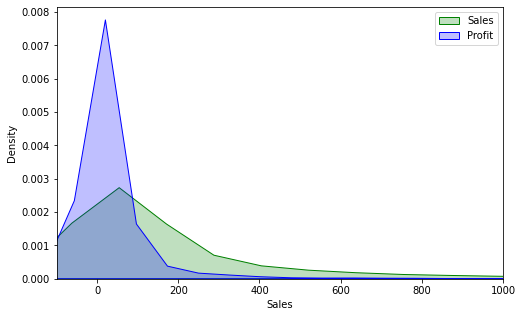

In [41]:
plt.figure(figsize=(8,5))
sns.kdeplot(df1['Sales'],color='green',label='Sales',shade=True)
sns.kdeplot(df1['Profit'],color='Blue',label='Profit',shade=True)
plt.xlim([-100,1000])
plt.legend()

It can be seen that profit has direct relation with sales increases profit increases although the profit margin per sale in few reigns are not same as other, so it can be increased

**Realtion between diffrent column with individual columns**




**Category**

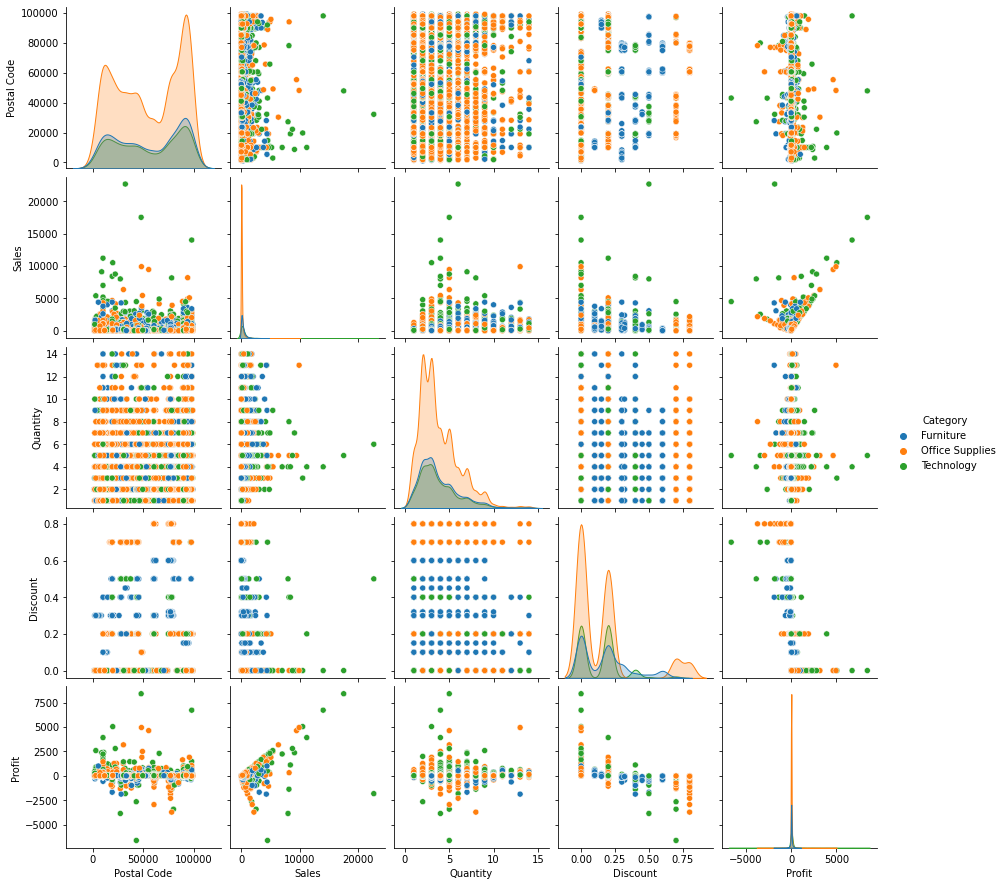

In [42]:
sns.pairplot(df1,hue='Category')


** Reign**

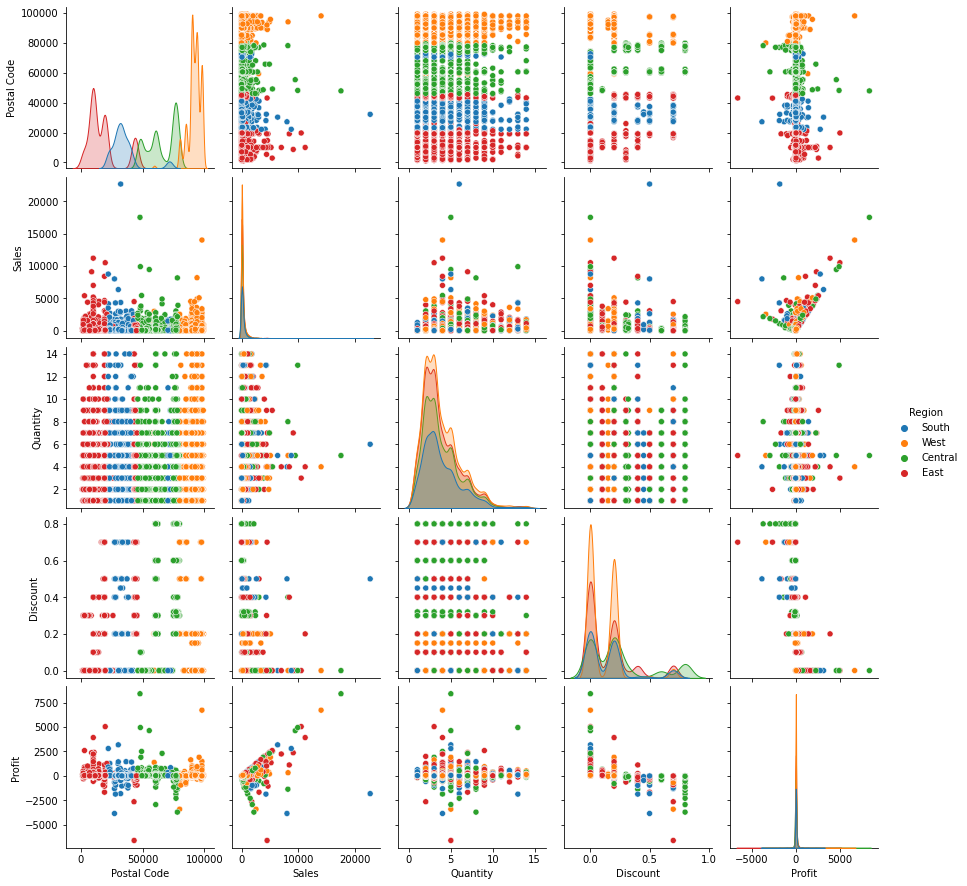

In [43]:
sns.pairplot(df1,hue='Region')


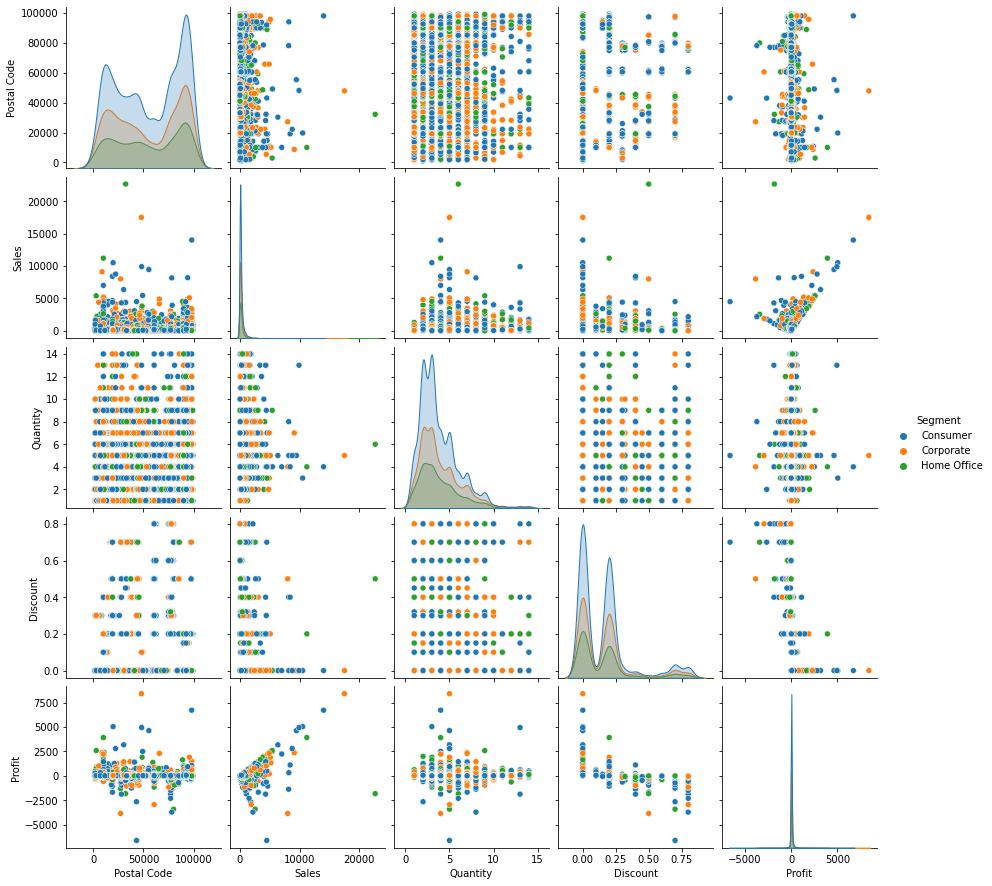

In [44]:
sns.pairplot(df1,hue='Segment')


**Correlation between diffrent columns**

In [45]:
df1.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


***Heatmap ***

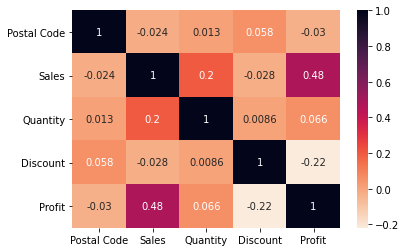

In [46]:
sns.heatmap(df1.corr(),cmap='rocket_r',annot=True)


**plot for subcategories**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sub-Category')

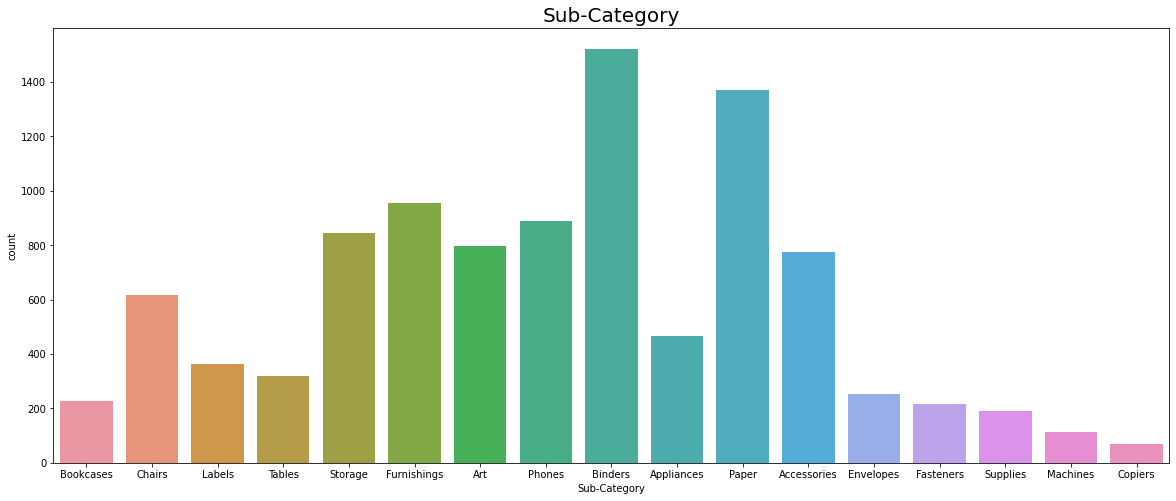

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(df1['Sub-Category'])
plt.title('Sub-Category',fontsize=20)

**Statewise deals**

In [52]:
df2 = df1['State'].value_counts()
df2.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

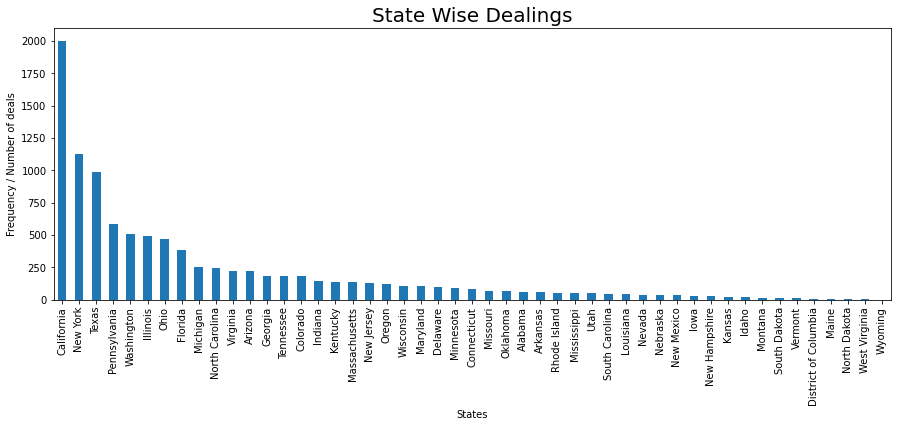

In [53]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('States')

plt.title('State Wise Dealings', fontsize = 20)
plt.show()

**Here is top 3 state where deals are highest**

Califonia

New York

Texas

Wyoming: Lowest Number of deal

In [72]:
df1['State'].value_counts().mean()


203.9591836734694

average deal per state is approx 204

**Statewise profits**

In [62]:

df1['State'].value_counts().head(10)


California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [68]:
df_state= df1.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


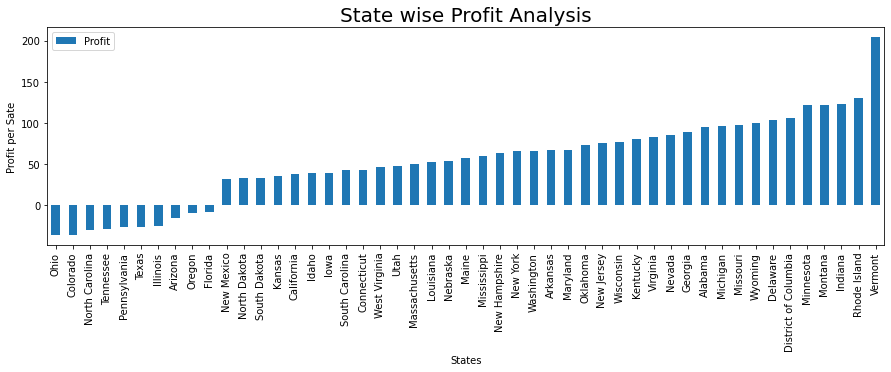

In [71]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,4))
plt.title('State wise Profit Analysis', fontsize = 20)
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()


RESULT

Vermont: Highest Profit

Ohio: Lowest Profit

**citywise analysis**

In [ ]:
df2 = df['City'].value_counts()
df2=df2.head(50

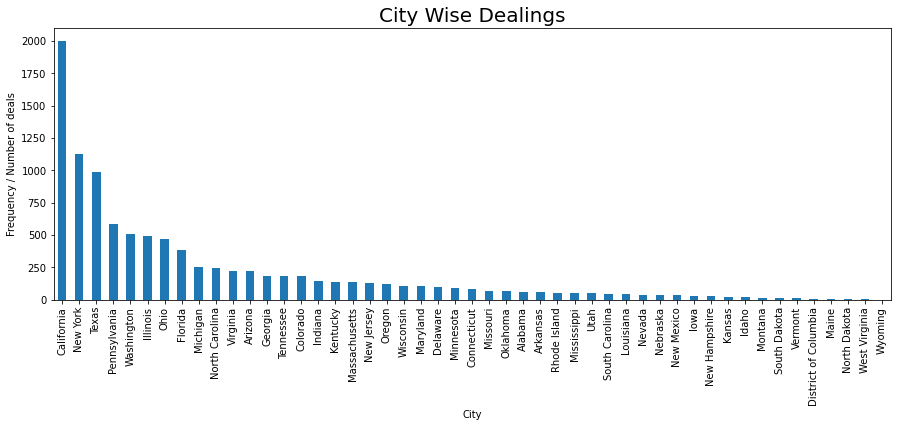

In [85]:
df2.plot(kind='bar',figsize=(15,5))
plt.ylabel('Frequency / Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings', fontsize = 20)
plt.show()

Here is top 3 city where deals are Highest.

1. New York City
2. Los Angeles
3. Philadelphia

In [84]:
df1['City'].value_counts().mean()

18.821092278719398

Average deals per city is 19

In [83]:
df1_quantity = df1.groupby(['Quantity'])[['Sales', 'Discount', 'Profit']].mean()
df1_quantity.head(10)

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


** Quantity wise  sales profit and Discount**

Text(0.5, 1.0, 'Quantity wise analysis of Sale, Discount, profit')

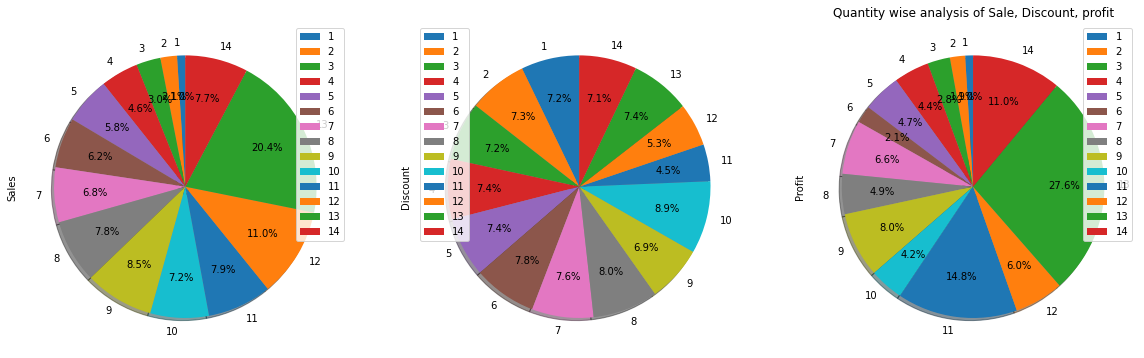

In [90]:
#1. sales 2. Discount 3. Profit
df1_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df1_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')

**Category  wise analysis**

In [80]:
df_category = df1.groupby(['Category'])[['Sales', 'Discount', 'Profit']].mean()
df_category

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff61114e950>,
      dtype=object)

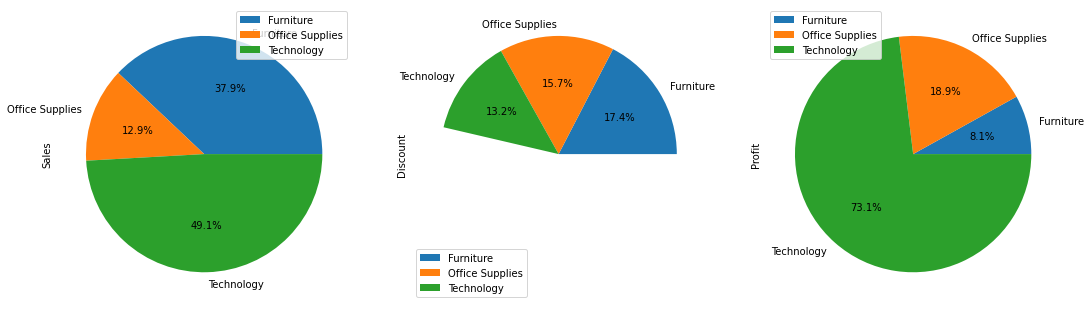

In [81]:
df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)

Maximun sales and Profit obtain in Technology.
Minimun profit obtain in Furniture

**Ship mode wise Analysis**

In [76]:
df1['Ship Mode'].value_counts()


Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff60dfb1090>,
      dtype=object)

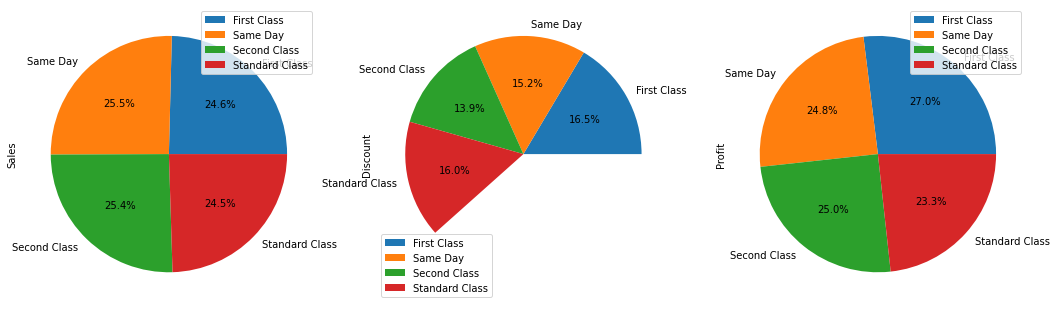

In [75]:
df_shipmode = df1.groupby(['Ship Mode'])[['Sales', 'Discount', 'Profit']].mean()
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)

Profit and Discount is high in First Class

Sales is high for Same day ship




# **Final Insights**

1. Profit is more than that of sale but there are some areas where profit could be increased.

2. Profit and Discount is high in First Class

3. Sales is high for Same day ship


6. Category: Maximun sales and Profit obtain in Technology.

7. Category: Minimun profit obtain in Furniture

8. State: Vermont: Highest Profit

9. State: Ohio: Lowest Profit

10. Segment: Home-office: High Profit & sales

11. Here is top 3 city where deals are Highest.

**New York City**

**Los Angeles**

**Philadelphia**

12. Sales and Profit are Moderately Correlated.

13. Quantity and Profit are less Moderately Correlated.

14. Discount and Profit are Negatively Correlated

15. Here is top 3 state where deals are Highest.

**Califonia**

**New York**

**Texas** 




